# DD Kinematic Simulation 
This section of the code simulates the position of the robot given the left and right velocities over time 't'
The radius of Instantaneous center of rotation (ICR) or instantaneous center of curvature (ICC), 'R' can be formulated as:
$$ R = l/2 ((v-l + v_r) / (v_r - v_l)) $$
where $l$ is the lenght of the robot chassis, $v_r$ is the right wheel velocity, and $v_l$ is the left wheel velocity.

We accomplish this by developing a python code 

In [1]:
import numpy as np
def diffdrive(x, y, theta, v_l, v_r, t, l):
    # straight line
    if (v_l == v_r):
        theta_n = theta
        x_n = x + v_l * t * np.cos(theta)
        y_n = y + v_l * t * np.sin(theta)
    # circular motion
    else:
        # Calculate the radius
        R = l/2.0 * ((v_l + v_r) / (v_r - v_l))
        # computing center of curvature
        ICC_x = x - R * np.sin(theta)
        ICC_y = y + R * np.cos(theta)
        # compute the angular velocity
        omega = (v_r - v_l) / l
        # computing angle change
        dtheta = omega * t
        # forward kinematics for differential drive
        x_n = np.cos(dtheta)*(x-ICC_x) - np.sin(dtheta)*(y-ICC_y) + ICC_x
        y_n = np.sin(dtheta)*(x-ICC_x) + np.cos(dtheta)*(y-ICC_y) + ICC_y
        theta_n = theta + dtheta
    return x_n, y_n, theta_n

starting pose: x: 1.500000, y: 2.000000, theta: 1.570796
after motion 1: x: 2.137642, y: 2.932039, theta: 0.370796


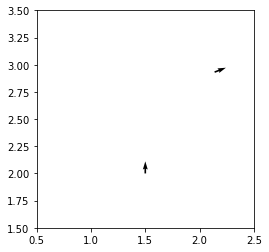

In [3]:
import matplotlib
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

plt.gca().set_aspect('equal')
plt.xlim([0.5, 2.5])
plt.ylim([1.5, 3.5])

# set the distance between the wheels and the initial robot position
l = 0.5
x, y, theta = 1.5, 2.0, (np.pi)/2.0
# plot the starting position
plt.quiver(x, y, np.cos(theta), np.sin(theta))
print ("starting pose: x: %f, y: %f, theta: %f" % (x, y, theta))
# first motion
v_l = 0.5
v_r = 0.3
t = 3
x, y, theta = diffdrive(x, y, theta, v_l, v_r, t, l)
plt.quiver(x, y, np.cos(theta), np.sin(theta))
print ("after motion 1: x: %f, y: %f, theta: %f" % (x, y, theta))

after motion 2: x: 2.137642, y: 2.932039, theta: -2.029204


(1.5, 3.5)

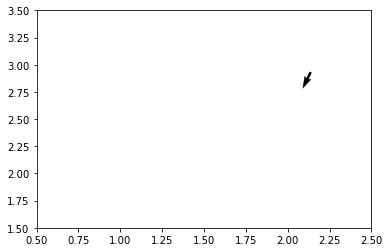

In [7]:
# second motion
v_l = 0.1
v_r = -0.1
t = 3
x, y, theta = diffdrive(x, y, theta, v_l, v_r, t, l)
plt.quiver(x, y, np.cos(theta), np.sin(theta))
print ("after motion 2: x: %f, y: %f, theta: %f" % (x, y, theta))
plt.xlim([0.5, 2.5])
plt.ylim([1.5, 3.5])

after motion 3: x: 1.891578, y: 2.793628, theta: -3.229204


(1.5, 3.5)

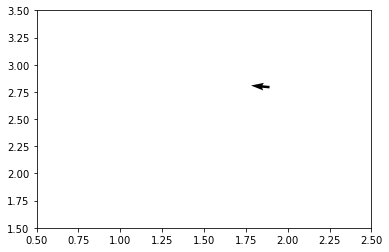

In [9]:
# third motion
v_l = 0.2
v_r = 0.0
t = 3
x, y, theta = diffdrive(x, y, theta, v_l, v_r, t, l)
plt.quiver(x, y, np.cos(theta), np.sin(theta))
print ("after motion 3: x: %f, y: %f, theta: %f" % (x, y, theta))
plt.xlim([0.5, 2.5])
plt.ylim([1.5, 3.5])


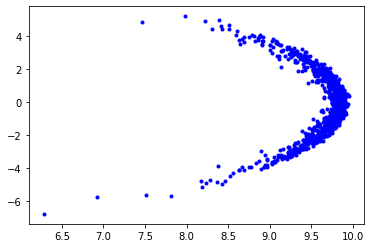

In [11]:
import matplotlib
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

L = 0.2
sigma = 0.05

plt.figure()


for i in range(1000):
    vR = 1 + np.random.normal(0, sigma)
    vL = 1 + np.random.normal(0, sigma)
    theta = 0
    x = 0
    y = 0
    dt = 0.1
    
    for t in np.arange(0.1, 10, dt):
        x = x + 0.5 * (vR + vL) * np.cos(theta) * dt
        y = y + 0.5 * (vR + vL) * np.sin(theta) * dt
        theta = theta + 1 / L * (vR - vL) * dt
        vR = 1 + np.random.normal(0, sigma)
        vL = 1 + np.random.normal(0, sigma)
    
    plt.plot(x, y, 'b.')

plt.show()

starting pose: x: 1.500000, y: 2.000000, theta: 1.570796
after motion 1: x: 2.135948, y: 2.967192, theta: 0.407510
after motion 1: x: 3.259218, y: 2.759765, theta: -0.772723
after motion 1: x: 3.487249, y: 1.654020, theta: -1.962123
after motion 1: x: 2.546031, y: 0.987777, theta: -3.089109
after motion 1: x: 1.533412, y: 1.530960, theta: -4.178781
after motion 1: x: 1.674471, y: 2.619200, theta: -5.503801
after motion 1: x: 2.760088, y: 2.786410, theta: -6.756926
after motion 1: x: 3.271405, y: 1.777378, theta: -8.012988
after motion 1: x: 2.522523, y: 0.900206, theta: -9.108305
after motion 1: x: 1.446474, y: 1.218466, theta: -10.316388


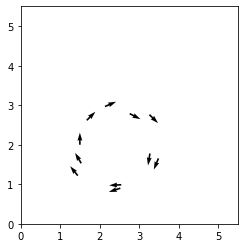

In [27]:
import matplotlib
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

plt.gca().set_aspect('equal')
plt.xlim([0.0, 5.5])
plt.ylim([0.0, 5.5])

# set the distance between the wheels and the initial robot position
l = 0.5
x, y, theta = 1.5, 2.0, (np.pi)/2.0
sigma = 0.01

# plot the starting position
plt.quiver(x, y, np.cos(theta), np.sin(theta))
print ("starting pose: x: %f, y: %f, theta: %f" % (x, y, theta))
TRIALS = 10
# first motion
for trial in range(1, TRIALS+1): 
    v_l = 0.5
    v_r = 0.3
    v_r = v_r + (sigma * np.random.randn(1))
    v_l = v_l + (sigma * np.random.randn(1))
    t = 3
    x, y, theta = diffdrive(x, y, theta, v_l, v_r, t, l)
    plt.quiver(x, y, np.cos(theta), np.sin(theta))
    print ("after motion 1: x: %f, y: %f, theta: %f" % (x, y, theta))

